# **Creating the network**

## Installing and importing the *libraries*

In [1]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=7883222c0b209c427eb7c347179879f999afdebdca7505c8e0a4d82b93651036
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [35]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Defining the seeds and stopping conditions

In [3]:
SEED = ["Baldur's Gate (série)".title(), "Dragon Age".title(), "Mass Effect".title()]
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")

## Creating support lists and blank graphs

In [4]:
todo_lst0 = [(0, SEED[0])] # The SEED is in the layer 0
todo_set0 = set(SEED[0]) # The SEED itself
done_set0 = set() # Nothing is done yet

In [5]:
todo_lst1 = [(0, SEED[1])] # The SEED is in the layer 0
todo_set1 = set(SEED[1]) # The SEED itself
done_set1 = set() # Nothing is done yet

In [6]:
todo_lst2 = [(0, SEED[2])] # The SEED is in the layer 0
todo_set2 = set(SEED[2]) # The SEED itself
done_set2 = set() # Nothing is done yet

In [7]:
g0 = nx.DiGraph()
layer0, page0 = todo_lst0[0]

In [8]:
g1 = nx.DiGraph()
layer1, page1 = todo_lst1[0]

In [9]:
g2 = nx.DiGraph()
layer2, page2 = todo_lst2[0]

## Filling graphs

In [10]:
def preencher_grafo (layer, page, todo_lst, todo_set, done_set, g):
  while layer < 2:
    # Remove the name page of the current page from the todo_lst,
    # and add it to the set of processed pages.
    # If the script encounters this page again, it will skip over it.
    del todo_lst[0]
    done_set.add(page)

    # Show progress
    print(layer, page)

    # Attempt to download the selected page.
    try:
      wiki = wikipedia.page(page)
    except:
      print("Could not load", page)
      layer, page = todo_lst[0]
      continue

    for link in wiki.links:
      link = link.title()
      if link not in STOPS and not link.startswith("List Of"):
        if link not in todo_set and link not in done_set:
          todo_lst.append((layer + 1, link))
          todo_set.add(link)
        g.add_edge(page, link)
    layer, page = todo_lst[0]


In [11]:
preencher_grafo(layer0, page0, todo_lst0, todo_set0, done_set0, g0)

0 Baldur'S Gate (Série)
1 A-Level
1 Actress
Could not load Actress
1 Alt-Right
1 Army Cadet Force
1 Audie Award For Science Fiction
1 Audie Awards
1 Audio Publishers Association
1 Audre Lorde
1 Axiom'S End
1 Bbc
Could not load Bbc
1 Bbc News
1 Bbc Iplayer
Could not load Bbc Iplayer
1 Baldur'S Gate 3
Could not load Baldur'S Gate 3
1 Baldur'S Gate Iii
Could not load Baldur'S Gate Iii
1 Bay Area Reporter
1 Ben Hunte
1 Bisexuality
1 Black Mirror: Bandersnatch
1 Bourne (Franchise)
1 Brandon Rogers (Youtuber)
1 Breadtube
1 Breitbart News
Could not load Breitbart News
1 British Broadcasting Corporation
1 British Comedy Guide
1 British Film Institute
1 British Lgbt Award
1 British Lgbt Awards
1 Broadwayworld
1 Broadway World
1 Covid-19 Lockdowns
1 Choice Reviews
1 Climate Change
1 Coming Out
1 Complete Works Of Shakespeare
1 Contrapoints
1 Count Dracula
1 Daily Xtra
1 Data Mining
Could not load Data Mining
1 Deutsche Welle
1 Diva (Magazine)
1 Django (1966 Film)
1 Django (Tv Series)
1 Dominique

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load The Times
1 Timothy Morton
1 Trans Woman
1 Transgender
1 Transgender Health Care
1 Transgender Woman
1 Triplec
1 Troilus And Cressida
1 Tubefilter
1 Tuition Fees In The United Kingdom
1 Tweet (Social Media)
1 Twitch (Service)
1 Twitter
1 University Of Essex
1 University Of St. Andrews
1 University Of St Andrews
Could not load University Of St Andrews
1 Variety (Magazine)
1 Vidcon
1 Vox (Website)
1 Vulture (Magazine)
1 Why Marx Was Right
1 William Shakespeare
1 Youtube
1 Youtube Creator Awards
1 Youtube User (Identifier)
1 Youtuber


In [13]:
print("{} nodes, {} edges".format(len(g0), nx.number_of_edges(g0)))

35903 nodes, 52581 edges


In [14]:
preencher_grafo(layer1, page1, todo_lst1, todo_set1, done_set1, g1)

0 Dragon Age
1 Aaa (Video Game Industry)
1 A Song Of Ice And Fire
1 Absolute Monarchy
1 Action Role-Playing Games
Could not load Action Role-Playing Games
1 Adobe Flash
1 Adobe Flash Player
1 Adult Animation
1 Alistair (Dragon Age)
1 Ancestor Worship
1 Anders (Dragon Age)
1 Android (Operating System)
1 Anime
1 Anime News Network
1 Anthem (Video Game)
1 Anthology
1 Apostasy
1 Archetype Entertainment
1 Baldur'S Gate
Could not load Baldur'S Gate
1 Baldur'S Gate: Tales Of The Sword Coast
1 Baldur'S Gate (Series)
1 Baldur'S Gate (Video Game)
Could not load Baldur'S Gate (Video Game)
1 Baldur'S Gate Ii: Shadows Of Amn
1 Baldur'S Gate Ii: Throne Of Bhaal
1 Beamdog
1 Bioware
Could not load Bioware
1 Black Isle Studios
1 Browser Game
1 Casey Hudson
1 Cassandra Pentaghast
1 Caste System
1 Character Class
1 Characters Of Dragon Age: Inquisition
1 Characters Of Dragon Age: Origins
1 Characters Of Dragon Age Ii
1 Chart-Track
1 Civil Religion
1 Command & Conquer (Cancelled Video Game)
Could not load

In [15]:
print("{} nodes, {} edges".format(len(g1), nx.number_of_edges(g1)))

39837 nodes, 68943 edges


In [16]:
preencher_grafo(layer2, page2, todo_lst2, todo_set2, done_set2, g2)

0 Mass Effect
1 1Up.Com
1 3D Printing
Could not load 3D Printing
1 Aaa (Video Game Industry)
1 Afl (Video Game Series)
1 Action Role-Playing
1 Action Role-Playing Games
Could not load Action Role-Playing Games
1 Advertising Standards Authority (United Kingdom)
1 Alien (Film)
Could not load Alien (Film)
1 American Mcgee'S Alice
1 Amy Hennig
Could not load Amy Hennig
1 Andrew Wilson (Businessman)
1 Android (Operating System)
1 Andromeda Galaxy
1 Andy Hollis
1 Anime
1 Anime News Network
1 Anthem (Video Game)
1 App Store (Ios)
1 Appropriation (Art)
1 Archetype Entertainment
1 Army Of Two
1 Ars Technica
1 Asari (Mass Effect)
1 Ashley Williams (Mass Effect)
1 Avi Arad
Could not load Avi Arad
1 Baldur'S Gate
Could not load Baldur'S Gate
1 Baldur'S Gate: Tales Of The Sword Coast
1 Baldur'S Gate (Video Game)
Could not load Baldur'S Gate (Video Game)
1 Baldur'S Gate Ii: Shadows Of Amn
1 Baldur'S Gate Ii: Throne Of Bhaal
1 Battlefield (Video Game Series)
1 Battlestar Galactica
1 Beamdog
1 Bejewel

In [17]:
print("{} nodes, {} edges".format(len(g2), nx.number_of_edges(g2)))

48544 nodes, 105166 edges


## Cleaning graphs

In [18]:
original0 = g0.copy()
original1 = g1.copy()
original2 = g2.copy()


In [19]:
def limpar_grafo (g):
  # remove self loops
  g.remove_edges_from(nx.selfloop_edges(g))

  # remove isolated nodes
  g.remove_nodes_from(list(nx.isolates(g)))

  # identify duplicates like that: 'network' and 'networks'
  duplicates = [(node, node + "s")
                for node in g if node + "s" in g
              ]

  for dup in duplicates:
    # *dup is a technique named 'unpacking'
    g = nx.contracted_nodes(g, *dup, self_loops=False)

  print(duplicates)

  # nx.contracted creates a new node/edge attribute called contraction
  # the value of the attribute is a dictionary, but GraphML
  # does not support dictionary attributes
  nx.set_node_attributes(g, 0,"contraction")
  nx.set_edge_attributes(g, 0,"contraction")

In [20]:
limpar_grafo(g0)

[('A-Level', 'A-Levels'), ('British Lgbt Award', 'British Lgbt Awards'), ('House Of The Dragon', 'House Of The Dragons'), ('Off West End Theatre Award', 'Off West End Theatre Awards'), ('Ancient Greek', 'Ancient Greeks'), ('Blog', 'Blogs'), ('Hate Crime', 'Hate Crimes'), ('Pogrom', 'Pogroms'), ('Adele Park', 'Adele Parks'), ('Audie Award For Short Stories Or Collection', 'Audie Award For Short Stories Or Collections'), ('Afro-German', 'Afro-Germans'), ('Lesbian Bar', 'Lesbian Bars'), ('Audie Award', 'Audie Awards'), ('Forced Marriage', 'Forced Marriages'), ('Gender Role', 'Gender Roles'), ('Sexually Transmitted Infection', 'Sexually Transmitted Infections'), ('Testicle', 'Testicles'), ('Primetime Emmy Award', 'Primetime Emmy Awards'), ('Academy Award', 'Academy Awards'), ('Thriller Film', 'Thriller Films'), ('Vtuber', 'Vtubers'), ('Video Essay', 'Video Essays'), ('Timeline Of Bbc', 'Timeline Of Bbcs'), ('Coral Reef', 'Coral Reefs'), ('Electric Vehicle', 'Electric Vehicles'), ('Ice Age'

In [21]:
limpar_grafo(g1)

[('Role-Playing Video Game', 'Role-Playing Video Games'), ('Slave Rebellion', 'Slave Rebellions'), ('Strategy Video Game', 'Strategy Video Games'), ('Video Game Developer', 'Video Game Developers'), ('Video Game Genre', 'Video Game Genres'), ('Video Game Publisher', 'Video Game Publishers'), ('Action-Adventure Game', 'Action-Adventure Games'), ('Action Role-Playing Game', 'Action Role-Playing Games'), ('Adventure Game', 'Adventure Games'), ('Casual Game', 'Casual Games'), ('City-Building Game', 'City-Building Games'), ('Cutscene', 'Cutscenes'), ('Digital Collectible Card Game', 'Digital Collectible Card Games'), ('First-Person Shooter', 'First-Person Shooters'), ('Indie Game', 'Indie Games'), ('Rhythm Game', 'Rhythm Games'), ('Tactical Shooter', 'Tactical Shooters'), ('Video Game', 'Video Games'), ('Emmy Award', 'Emmy Awards'), ('Graphic Novel', 'Graphic Novels'), ('Hugo Award', 'Hugo Awards'), ('Nebula Award', 'Nebula Awards'), ('White Walker', 'White Walkers'), ('World Fantasy Award'

In [22]:
limpar_grafo(g2)

[('Business Insider', 'Business Insiders'), ('Cutscene', 'Cutscenes'), ('Motive Studio', 'Motive Studios'), ('Player Character', 'Player Characters'), ('Video Game Genre', 'Video Game Genres'), ('Video Game Publisher', 'Video Game Publishers'), ('Podcast', 'Podcasts'), ('Video Game', 'Video Games'), ('Action Game', 'Action Games'), ('Action Role-Playing Game', 'Action Role-Playing Games'), ("Beat 'Em Up", "Beat 'Em Ups"), ('City-Building Game', 'City-Building Games'), ('Digital Collectible Card Game', 'Digital Collectible Card Games'), ('Expansion Pack', 'Expansion Packs'), ('Fighting Game', 'Fighting Games'), ('First-Person Shooter', 'First-Person Shooters'), ('Grand Strategy Wargame', 'Grand Strategy Wargames'), ('Multiplayer Video Game', 'Multiplayer Video Games'), ('Racing Game', 'Racing Games'), ('Rhythm Game', 'Rhythm Games'), ("Shoot 'Em Up", "Shoot 'Em Ups"), ('Strategy Video Game', 'Strategy Video Games'), ('Tactical Shooter', 'Tactical Shooters'), ('Tile-Matching Video Game',

In [23]:
print("{} nodes, {} edges".format(len(g0), nx.number_of_edges(g0)))
print("{} nodes, {} edges".format(len(g1), nx.number_of_edges(g1)))
print("{} nodes, {} edges".format(len(g2), nx.number_of_edges(g2)))

35903 nodes, 52573 edges
39837 nodes, 68923 edges
48544 nodes, 105135 edges


## Filtering nodes with 2 neighbors or more

In [24]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g0.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub0 = nx.subgraph(g0, core)

print("{} nodes, {} edges".format(len(gsub0), nx.number_of_edges(gsub0)))

8666 nodes, 25336 edges


In [25]:
# filter nodes with degree greater than or equal to 2
core1 = [node for node, deg in dict(g1.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub1 = nx.subgraph(g1, core1)

print("{} nodes, {} edges".format(len(gsub1), nx.number_of_edges(gsub1)))

9630 nodes, 38716 edges


In [26]:
# filter nodes with degree greater than or equal to 2
core2 = [node for node, deg in dict(g2.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub2 = nx.subgraph(g2, core)

print("{} nodes, {} edges".format(len(gsub2), nx.number_of_edges(gsub2)))

3333 nodes, 4178 edges


In [27]:
g=nx.compose_all([gsub0, gsub1, gsub2])

In [28]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

16171 nodes, 65086 edges


In [ ]:
nx.write_graphml(g, "g.graphml")

In [ ]:
nx.write_graphml(gsub0,"gsub0.graphml")
nx.write_graphml(gsub1,"gsub1.graphml")

In [ ]:
nx.write_graphml(gsub2,"gsub2.graphml")

## Histogram, PDF and CDF

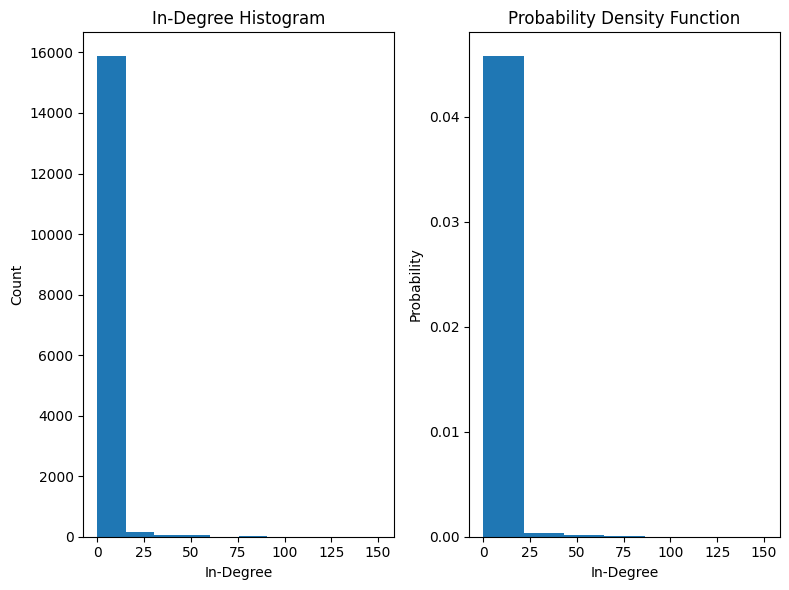

In [31]:
plt.style.use("default")
# degree sequence
indegree_sequence = sorted([d for n, d in g.in_degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(indegree_sequence,bins=7)
ax[1].hist(indegree_sequence,bins=7,density=True)

ax[0].set_title("In-Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("In-Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("In-Degree")

plt.tight_layout()
plt.show()

In [33]:
# calc the width of each bin using numpy
# diff calc the difference between two positions in the array
bin_width = np.diff(all_data[1])
bin_width

array([15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1])

In [34]:
# probability density function for each bin
# please check the right figure above and compare the results
all_data[0]/(all_data[0].sum() * bin_width)

array([6.49965743e-02, 5.89723817e-04, 2.94861908e-04, 2.29337040e-04,
       2.86671300e-05, 6.14295642e-05, 1.63812171e-05, 4.09530428e-06,
       0.00000000e+00, 4.09530428e-06])

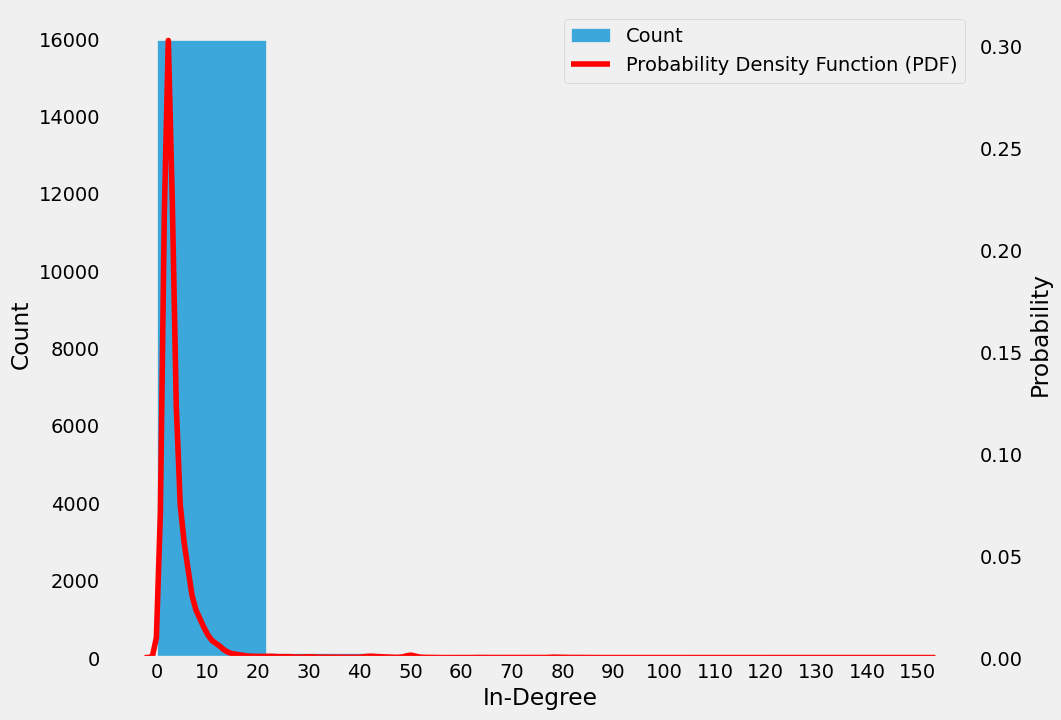

In [43]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(indegree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(indegree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# Definindo os ticks do eixo x para intervalos de 10 em 10
ax.set_xticks(range(0, max(indegree_sequence) + 1, 10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("In-Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=False,dpi=600,bbox_inches="tight")
plt.show()

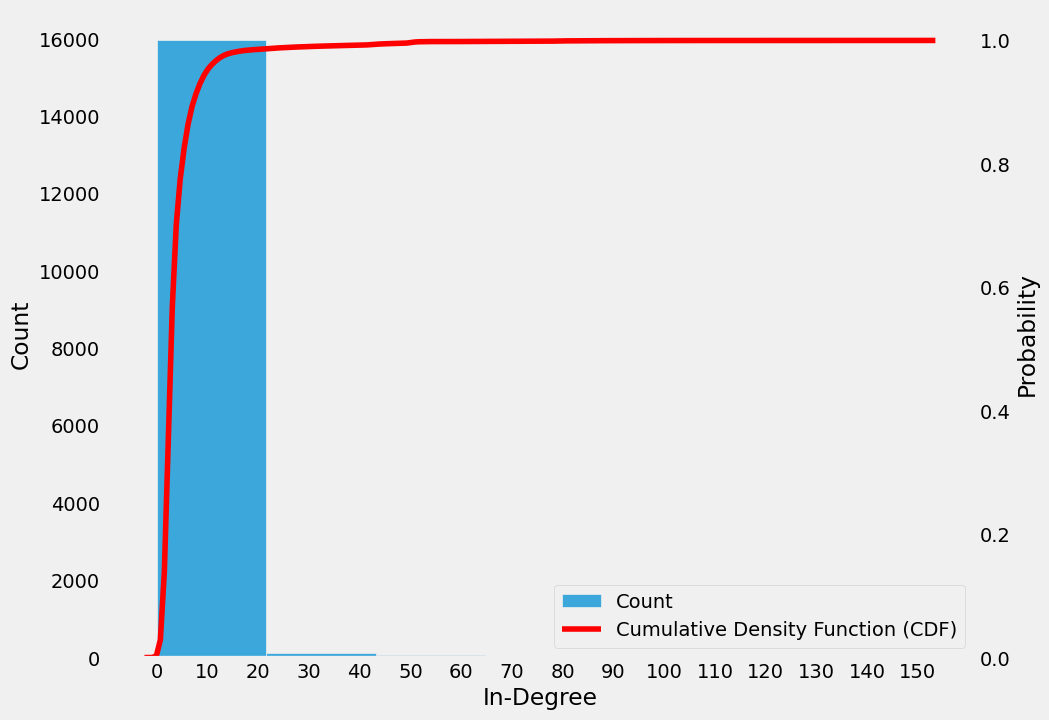

In [44]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(indegree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(indegree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# Definindo os ticks do eixo x para intervalos de 10 em 10
ax.set_xticks(range(0, max(indegree_sequence) + 1, 10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("In-Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=False,dpi=600,bbox_inches="tight")
plt.show()

## Finding K-core and K-shell

In [45]:
set([v for k,v in nx.core_number(g).items()])

{2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 30,
 31,
 32,
 33,
 34,
 36,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 51,
 54,
 60,
 68,
 76,
 92}

In [46]:
core = 92
for i in nx.k_core(g,core):
  print(i)

Dragon Age: The Veilguard
Dragon Age: The Stolen Throne
Hawke (Dragon Age)
Dragon Age
Cassandra Pentaghast
Dragon Age: Inquisition – Jaws Of Hakkon
Anders (Dragon Age)
Dragon Age: Knight Errant
Dragon Age: Absolution
Dragon Age: Tevinter Nights
Dragon Age: Inquisition – The Descent
Characters Of Dragon Age: Inquisition
Dragon Age: Magekiller
Vivienne (Dragon Age)
Characters Of Dragon Age Ii
Music Of Dragon Age: Origins
Alistair (Dragon Age)
James Ohlen
Mike Laidlaw
Darkspawn
Dragon Age: Dawn Of The Seeker
Krem (Dragon Age)
Dragon Age: Origins – Return To Ostagar
Dragon Age: The Silent Grove
Morrigan (Dragon Age)
Varric Tethras
Dragon Age Ii Downloadable Content
Sera (Dragon Age)
Dragon Age: Deception
Dragon Age: Redemption
Dragon Age: Origins Downloadable Content
Dragon Age: The Masked Empire
Iron Bull
Dragon Age: Origins – Awakening
Dragon Age: Inquisition
Dorian Pavus
Characters Of Dragon Age: Origins
Dragon Age: Blue Wraith
Patrick Weekes
Dragon Age: Origins
Loghain
Dragon Age: Last

In [48]:
shell = 76
for i in nx.k_shell(g,shell):
  print(i)

Mass Effect
Manveer Heir
Casey Hudson
Shadow Realms
Archetype Entertainment
Ray Muzyka
Jennifer Hepler
Mac Walters
Mass Effect 2
Star Wars: The Old Republic
Mass Effect Galaxy
Mass Effect: Andromeda
Neverwinter Nights (2002 Video Game)
Jade Empire
Mass Effect 3
Mass Effect (Video Game)
Anthem (Video Game)
Neverwinter Nights: Shadows Of Undrentide
Baldur'S Gate Ii: Throne Of Bhaal
Baldur'S Gate: Tales Of The Sword Coast
Bioware
David Gaider
Shattered Steel
Jeff Hickman
Star Wars: The Old Republic – Rise Of The Hutt Cartel
Electronic Arts
Drew Karpyshyn
Sonic Chronicles: The Dark Brotherhood
Neverwinter Nights: Hordes Of The Underdark
Greg Zeschuk
Baldur'S Gate Ii: Shadows Of Amn
Dragon Age: Dreadwolf
